# Tutorial 6: RFE on all features

---

### Introduction

Hello, this notebook will show how to use RFE to perform further feature selection, as we found that most features are very highly correlated, therfore we would need to remove those using the tool that we mentioned above. 

first, let us call the data

In [1]:
%store -r df_input_GD
%store -r y_GD
%store -r df_GD

In [2]:
y_GD = y_GD.map({'S': 1, 'B': 0})

---

calling some packages

In [3]:
# Python packages 
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt

---

<b><i> Data splitting </i></b> 

In [4]:
from sklearn.model_selection import train_test_split

Xtrain_finall, Xtest_finall, Ytrain_finall, Ytest_finall = train_test_split( df_input_GD, y_GD, test_size = 0.3, random_state=3, stratify=y_GD) # train and valid sets

Xtrain, Xtest, Ytrain, Ytest = train_test_split( Xtrain_finall, Ytrain_finall, test_size = 0.3, random_state=3, stratify=Ytrain_finall) # train and valid sets

In [5]:
print(Xtrain.shape)
print(Xtest.shape)

(267, 2074)
(115, 2074)


---

<b><i> get the best N features </i></b> 

In [6]:
%store -r featImp_GD

In [7]:
arrimp = np.array(featImp_GD).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-10:])

[ 15 205 144 153  71 180 157  60  43  86]


In [13]:
# cols_ordered = df_input_GD.columns[sorted_idx][-200:]
cols_ordered = df_input_GD.columns[sorted_idx]

cols_ordered

Index([1346.127, 1376.867, 1366.706, 1338.483, 1367.427, 1361.681, 1363.113,
       1896.591, 1351.037, 1343.337,
       ...
        837.687,  892.475,  874.121,  876.781,  853.123,   884.86,  877.969,
        850.046,  845.334,  857.355],
      dtype='object', length=2074)

---

In [14]:
Xtrain[cols_ordered]

,1346.127,1376.867,1366.706,1338.483,1367.427,1361.681,1363.113,1896.591,1351.037,1343.337,...,837.687,892.475,874.121,876.781,853.123,884.860,877.969,850.046,845.334,857.355
390,0.819178,0.751795,0.786673,0.832418,0.784061,0.796084,0.793079,0.435873,0.811352,0.823202,...,1.073175,1.069444,1.074404,1.075410,1.070955,1.076398,1.077060,1.074658,1.069245,1.072751
387,1.181236,1.121173,1.156632,1.187846,1.155358,1.166458,1.161798,0.547112,1.176666,1.182726,...,1.083759,1.102652,1.095158,1.094740,1.084817,1.102318,1.097641,1.086728,1.086045,1.091894
82,-1.287090,-1.271850,-1.279841,-1.285430,-1.277478,-1.272694,-1.277527,-1.098119,-1.283778,-1.286905,...,-1.136482,-1.124357,-1.123132,-1.118182,-1.130941,-1.120571,-1.124837,-1.129967,-1.130318,-1.129509
231,-0.278311,-0.138970,-0.206292,-0.310614,-0.204626,-0.235667,-0.224186,-0.028220,-0.260685,-0.288605,...,-0.778319,-0.764354,-0.773417,-0.777017,-0.775705,-0.773266,-0.770768,-0.780913,-0.780160,-0.774863
92,-1.205885,-1.199726,-1.202068,-1.202928,-1.199729,-1.192474,-1.199141,-0.497322,-1.204339,-1.205979,...,-1.048097,-1.026964,-1.029220,-1.026552,-1.042397,-1.021666,-1.028401,-1.043967,-1.043051,-1.038386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1.244945,1.235629,1.238994,1.247206,1.239679,1.245064,1.242797,1.443695,1.244023,1.245688,...,1.281657,1.297762,1.296778,1.295549,1.282159,1.303682,1.299027,1.291414,1.287327,1.289458
448,1.384405,1.283668,1.341355,1.400394,1.341260,1.365649,1.356304,0.475537,1.379197,1.390457,...,1.254540,1.267011,1.258393,1.258921,1.250997,1.270007,1.264604,1.258756,1.256321,1.263501
482,1.560189,1.544388,1.558920,1.559469,1.559708,1.566422,1.563121,1.077124,1.562534,1.560818,...,1.194408,1.250676,1.229010,1.226928,1.207834,1.235981,1.223055,1.206959,1.193134,1.213936
157,-0.920283,-0.803154,-0.871879,-0.934745,-0.870158,-0.893279,-0.885603,0.634215,-0.911457,-0.925406,...,-0.793903,-0.787831,-0.791210,-0.792472,-0.794232,-0.791893,-0.789546,-0.791827,-0.797612,-0.792672


### RFE

In [37]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression

In [39]:
# https://machinelearningmastery.com/rfe-feature-selection-in-python/
selected = []
imp_ind = []
imp_freq = []

for i in range(1, 51, 1):
    print(i)
    sfs = RFE(estimator=LogisticRegression(solver = 'newton-cg'), n_features_to_select=i)
    # fit sfs
    sfs.fit(Xtrain[cols_ordered].values, Ytrain)
    # summarize all features
    selected_feat = []
    for i in range(Xtrain[cols_ordered].shape[1]):
        if sfs.support_[i] == True:
            selected_feat.append(i)
            print('Column: %d, Selected %s,' % (i, sfs.support_[i]))
        
    # print()
    selected.append(selected_feat)
    
    result = list(set(imp_ind) ^ set(selected[-1]))
    imp_freq.extend(Xtrain[cols_ordered].columns[result])    
    imp_ind.extend(result)    
    
    print(selected[-1])
    print(result)
    print(imp_ind)
    print(imp_freq)
    print()
    
    

1
Column: 1155, Selected True,
[1155]
[1155]
[1155]
[1347.526]

2
Column: 1155, Selected True,
Column: 1743, Selected True,
[1155, 1743]
[1743]
[1155, 1743]
[1347.526, 910.657]

3
Column: 1065, Selected True,
Column: 1155, Selected True,
Column: 1743, Selected True,
[1065, 1155, 1743]
[1065]
[1155, 1743, 1065]
[1347.526, 910.657, 1348.227]

4
Column: 1065, Selected True,
Column: 1155, Selected True,
Column: 1395, Selected True,
Column: 1743, Selected True,
[1065, 1155, 1395, 1743]
[1395]
[1155, 1743, 1065, 1395]
[1347.526, 910.657, 1348.227, 916.451]

5
Column: 1007, Selected True,
Column: 1065, Selected True,
Column: 1155, Selected True,
Column: 1395, Selected True,
Column: 1743, Selected True,
[1007, 1065, 1155, 1395, 1743]
[1007]
[1155, 1743, 1065, 1395, 1007]
[1347.526, 910.657, 1348.227, 916.451, 1348.928]

6
Column: 281, Selected True,
Column: 1007, Selected True,
Column: 1065, Selected True,
Column: 1155, Selected True,
Column: 1395, Selected True,
Column: 1743, Selected True,
[

---

### LR

In [40]:
lr = LogisticRegression()

In [41]:
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

In [42]:
models = [[lr, 'lr', 14]]
par = [lr_par]

In [43]:
from source.ml_acc import get_accuracy_ml

In [44]:
num_ml_tools = len(par)
ml_dicts = {}

for m, par in zip(models, par):
    key0 = str(m[1])
    ml_dicts[key0] = {}
    for f in selected:
        print(cols_ordered[f])

        xtr =  Xtrain[cols_ordered].iloc[:, f]
        xte =  Xtest[cols_ordered].iloc[:, f]
        print(xtr)
        results = get_accuracy_ml (m[0], m[2], par, np.array(xtr), np.array(Ytrain), np.array(xte), np.array(Ytest)) # to get the accuracies for the ml model

        key = str(m[1])+","+str(len(f))
        ml_dicts[key0][key] = {}

        ml_dicts[key0][key]['tot_acc'] = results[0]
        ml_dicts[key0][key]['jack_train'] = results[1]
        ml_dicts[key0][key]['jack_test'] = results[2]

Index([1347.526], dtype='object')
     1347.526
390  0.817577
387  1.179695
82  -1.284770
231 -0.273835
92  -1.204187
..        ...
397  1.244469
448  1.382519
482  1.561683
157 -0.918559
406  1.228297

[267 rows x 1 columns]
Index([1347.526, 910.657], dtype='object')
     1347.526   910.657
390  0.817577  1.069791
387  1.179695  1.120041
82  -1.284770 -1.130254
231 -0.273835 -0.760341
92  -1.204187 -1.026671
..        ...       ...
397  1.244469  1.307118
448  1.382519  1.274883
482  1.561683  1.264517
157 -0.918559 -0.798738
406  1.228297  1.234028

[267 rows x 2 columns]
Index([1348.227, 1347.526, 910.657], dtype='object')
     1348.227  1347.526   910.657
390  0.816618  0.817577  1.069791
387  1.179208  1.179695  1.120041
82  -1.284394 -1.284770 -1.130254
231 -0.271301 -0.273835 -0.760341
92  -1.204008 -1.204187 -1.026671
..        ...       ...       ...
397  1.244478  1.244469  1.307118
448  1.381724  1.382519  1.274883
482  1.561812  1.561683  1.264517
157 -0.917297 -0.918559 -0

---

In [56]:
import json

In [57]:
with open('ml_gd_fs.txt', 'w') as file:
     file.write(json.dumps(ml_dicts)) # use `json.loads` to do the reverse

In [58]:
import json
with open('ml_gd_fs.txt') as f:
    data = f.read()
    
ml_dicts = json.loads(data)

with open('base_gd_val.txt') as f:
    data = f.read()
    
baseDict = json.loads(data)
baseDict['lr'].keys()    

dict_keys(['lr, all'])

In [59]:
print(baseDict['lr'].keys()    )
print(ml_dicts['lr'].keys()    )

dict_keys(['lr, all'])
dict_keys(['lr,1', 'lr,2', 'lr,3', 'lr,4', 'lr,5', 'lr,6', 'lr,7', 'lr,8', 'lr,9', 'lr,10', 'lr,11', 'lr,12', 'lr,13', 'lr,14', 'lr,15', 'lr,16', 'lr,17', 'lr,18', 'lr,19', 'lr,20', 'lr,21', 'lr,22', 'lr,23', 'lr,24', 'lr,25', 'lr,26', 'lr,27', 'lr,28', 'lr,29', 'lr,30', 'lr,31', 'lr,32', 'lr,33', 'lr,34', 'lr,35', 'lr,36', 'lr,37', 'lr,38', 'lr,39', 'lr,40', 'lr,41', 'lr,42', 'lr,43', 'lr,44', 'lr,45', 'lr,46', 'lr,47', 'lr,48', 'lr,49', 'lr,50'])


In [60]:
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file

In [61]:
arr_all = []
for m, d in zip (models, ml_dicts.keys()):
    acc_arr = [] 
    sd_arr = [] 

    # print(ml_dicts[d])
    for key in ml_dicts[d].keys():
        acc_arr.append(ml_dicts[d][key][ 'tot_acc' ]) # append total accuracy to an array
        sd_train = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_train' ]) ), ml_dicts[d][key][ 'jack_train' ])[0]
        sd_test = jack_SD(np.zeros( len(ml_dicts[d][key][ 'jack_test' ]) ), ml_dicts[d][key][ 'jack_test' ])[0]
        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_arr.append(sd) # append sd_arr to an array
    arr_all.append([ list(ml_dicts[d].keys()), acc_arr, sd_arr])    

In [62]:
# base_val: [[['lr, all'], [0.864406779661017], [0.07989367507175697]]]
print(arr_all[0][1])


[0.5142857142857142, 0.6612903225806451, 0.6666666666666666, 0.6612903225806451, 0.6666666666666666, 0.8166666666666667, 0.8166666666666667, 0.8166666666666667, 0.8166666666666667, 0.8166666666666667, 0.8305084745762712, 0.8305084745762712, 0.8305084745762712, 0.8448275862068966, 0.8448275862068966, 0.8448275862068966, 0.8448275862068966, 0.8448275862068966, 0.8448275862068966, 0.8448275862068966, 0.8448275862068966, 0.8448275862068966, 0.8448275862068966, 0.847457627118644, 0.847457627118644, 0.8305084745762712, 0.8305084745762712, 0.8666666666666667, 0.8620689655172413, 0.8596491228070176, 0.8596491228070176, 0.8596491228070176, 0.8596491228070176, 0.8596491228070176, 0.8596491228070176, 0.8596491228070176, 0.8596491228070176, 0.8596491228070176, 0.847457627118644, 0.8448275862068966, 0.8448275862068966, 0.8448275862068966, 0.8448275862068966, 0.8448275862068966, 0.847457627118644, 0.847457627118644, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8305084745762712]


[0.         0.06122449 0.12244898 0.18367347 0.24489796 0.30612245
 0.36734694 0.42857143 0.48979592 0.55102041 0.6122449  0.67346939
 0.73469388 0.79591837 0.85714286 0.91836735 0.97959184 1.04081633
 1.10204082 1.16326531 1.2244898  1.28571429 1.34693878 1.40816327
 1.46938776 1.53061224 1.59183673 1.65306122 1.71428571 1.7755102
 1.83673469 1.89795918 1.95918367 2.02040816 2.08163265 2.14285714
 2.20408163 2.26530612 2.32653061 2.3877551  2.44897959 2.51020408
 2.57142857 2.63265306 2.69387755 2.75510204 2.81632653 2.87755102
 2.93877551 3.        ]


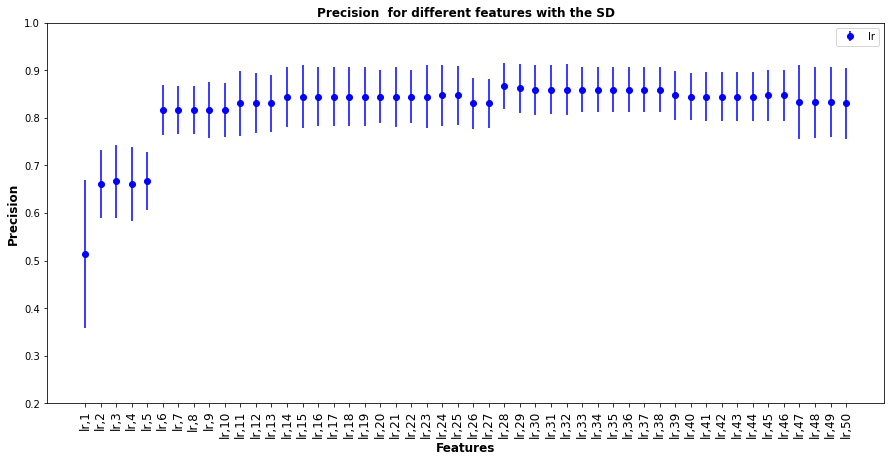

In [63]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  for different features with the SD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-1

space = []
tickFeat = []

for result, model, color in zip(arr_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,50)
    print(a)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1

plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =12)
plt.ylim(.2, 1)
plt.legend()

plt.show()

In [64]:
[5,4], [541]

([5, 4], [541])

In [65]:
arr_diff_all = []

for m, m_key in zip (models, ml_dicts.keys()):
    acc_diff_arr = [] 
    sd_diff_arr = [] 
    for f_key in ml_dicts[m_key].keys():
        value = f_key.split(',')
        acc_diff_arr.append( ml_dicts[m_key][f_key][ 'tot_acc' ] - baseDict['lr']['lr, all'][ 'tot_acc' ]  )

        sd_train = jack_SD( baseDict['lr']['lr, all'][ 'jack_train' ], ml_dicts[m_key][f_key]['jack_train'] )[0]
        sd_test = jack_SD(  baseDict['lr']['lr, all'][ 'jack_test' ],  ml_dicts[m_key][f_key]['jack_test']   )[0]

        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_diff_arr.append(sd) # append sd_arr to an array
    arr_diff_all.append([ list(ml_dicts[m_key].keys()), acc_diff_arr, sd_diff_arr]) 

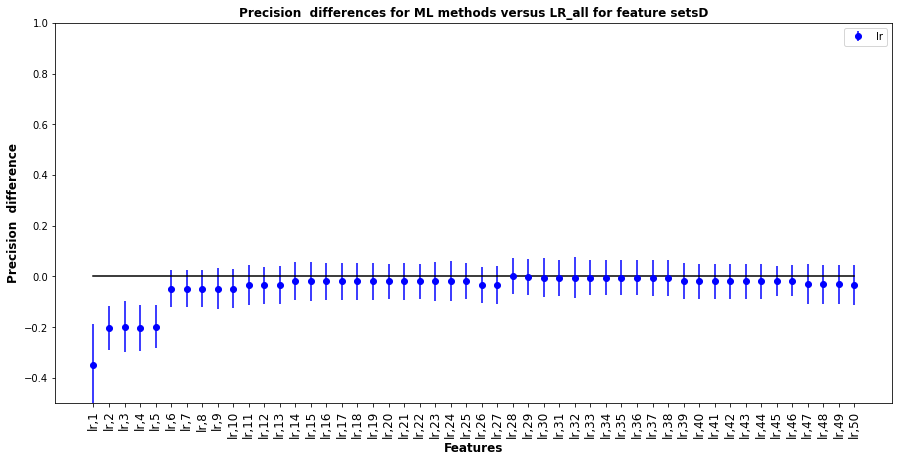

In [66]:
colors = ['blue', 'purple', 'green', 'orange', 'red', 'brown']
plt.figure(figsize=(15, 7))
plt.title( "Precision  differences for ML methods versus LR_all for feature setsD", fontweight ='bold', fontsize =12)
plt.xlabel("Features", fontweight ='bold', fontsize =12)
plt.ylabel("Precision  difference", fontweight ='bold', fontsize =12)

count = 0
n = len(colors)-0.5
space = []
tickFeat = []

for result, model, color in zip(arr_diff_all, models, colors):
    a = np.linspace(n*count, n*(1+count)-2,50)
    space.extend(a)
    tickFeat.extend(result[0])
    plt.errorbar( a, result[1], result[2], fmt='o', label =model[1], color = color)
    count += 1
    
plt.plot(np.array(space), np.zeros(50*1), color = 'Black')        
plt.xticks(space, tickFeat, rotation = 'vertical',  fontsize =12)
plt.ylim(-.5, 1)
plt.legend()

plt.show()

In [67]:
RFE_wave = [1347.526, 910.657, 1348.227, 916.451, 1348.928, 1473.929, 1346.826, 916.775, 1346.127, 916.128, 1345.428, 917.1, 1349.631, 1484.053, 1344.731, 917.424, 1344.033, 917.749, 1350.334, 1484.903, 1343.337, 918.074, 1342.641, 918.399, 1351.037, 1473.091, 1472.255, 2485.753, 1341.946, 918.724, 1341.252, 1485.754, 1340.559, 924.293, 1352.447, 1339.866, 924.622, 1351.742, 1876.006, 2495.323, 1486.606, 1339.174, 1338.483, 1487.459, 1076.231, 1337.792, 1075.784, 1337.102, 1483.204, 1336.413]

[1347.526, 910.657, 1348.227, 916.451, 1348.928, 1473.929, 1346.826, 916.775, 1346.127, 916.128]
[1345.428, 917.1, 1349.631, 1484.053, 1344.731, 917.424, 1344.033, 917.749, 1350.334, 1484.903]
[1343.337, 918.074, 1342.641, 918.399, 1351.037, 1473.091, 1472.255, 2485.753, 1341.946, 918.724]
[1341.252, 1485.754, 1340.559, 924.293, 1352.447, 1339.866, 924.622, 1351.742, 1876.006, 2495.323]


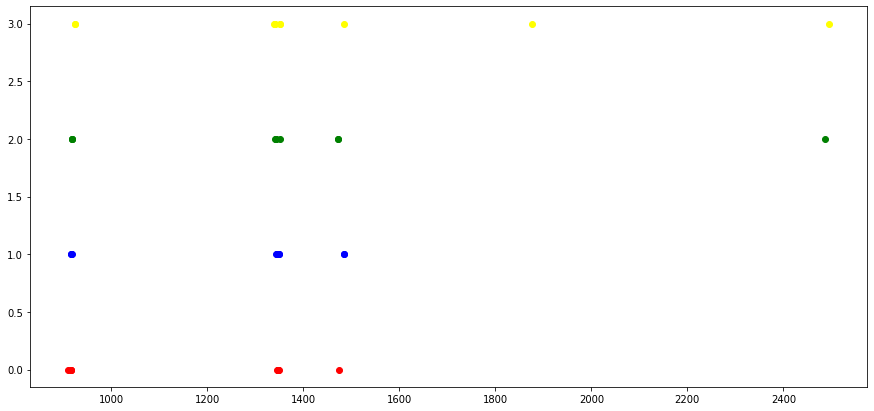

In [68]:
plt.rcParams["figure.figsize"] = (15,7)# 'xtick.labelsize', 'ytick.labelsize'
# plt.rcParams['ytick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
# plt.rcParams['xtick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
# plt.rcParams['axes.labelsize'] = 15
# plt.rcParams['axes.titlesize'] = 15
arrr= [0, 10, 20, 30, 40]
colrs = ['red', 'blue', 'green', 'yellow']
for i in range (4):
    
    print(RFE_wave[arrr[i]:arrr[i+1]])
                   
    plt.scatter(RFE_wave[arrr[i]:arrr[i+1]], np.zeros(10)+i, color = colrs[i])
plt.show()